In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

In [3]:
vgsales = pd.read_csv("vgsales.csv")

This video game dataset is from Kaggle. [Here](https://www.kaggle.com/gregorut/videogamesales)

## Data Overview

In [4]:
vgsales.info()
vgsales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Cleaning

In [6]:
# We are going to drop rows with null values
vgsales.dropna(inplace = True)

In [7]:
#Since there are too many publisher names, we are only interested in finding the top 10 publishers that have the most sales.
publisher_names = vgsales.Publisher.value_counts().head(10).index.tolist()

In [8]:
# Drop all non top 10 publishers
vgsales = vgsales.drop(vgsales[~vgsales.Publisher.isin(publisher_names)].index)

In [9]:
# We're also not interested in year and rank so we will drop this column
vgsales = vgsales.drop(["Rank","Year"],axis=1)

In [10]:
# Now we have 8108 records and 9 columns.
vgsales.shape

(8108, 9)

## What is the Structure of Dataset?
We have 16291 games in the dataset with and 11 features(Rank,Name,Platform,Year ,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales ,Global_Sales). Some of them are categorical. But in this exploration, we only use 8108 records and 9 features(Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales ,Global_Sales)
**Platform:**DS,PS2,PS3,Wii,360,PSP,PS,PC,XB,GBA,GC,3DS,PSV,PS4,N64,SNES,XOne,SAT,WiiU,2600,NES,GB,DC,GEN,NG,WS,SCD,3DO,TG16,PCFX,GG       
**Genre:**Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle  
**Publisher:** Electronic Arts,Activision,Namco Bandai Games,Ubisoft,
Konami Digital Entertainment.

## What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out how platform, publisher, and genre affect global sales.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The features are the same as above.

## Univariate Exploration

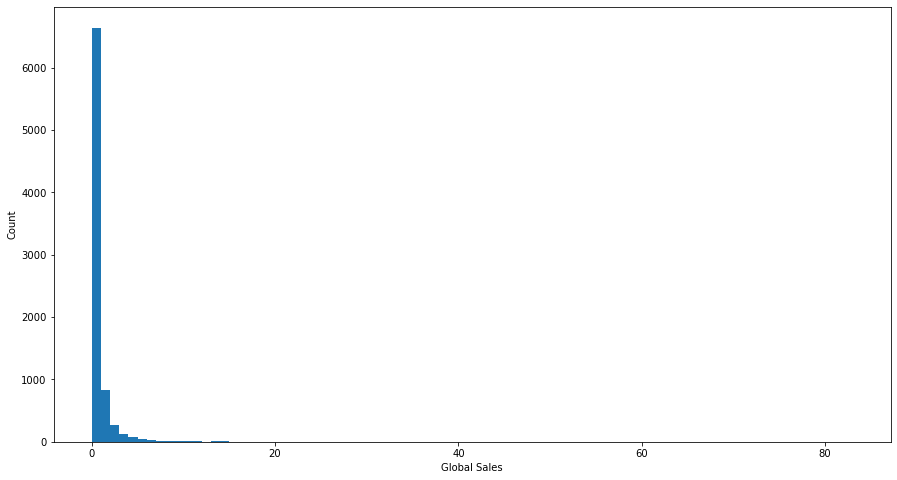

In [11]:
# First, let's explore the distribution of global price
binsize = 1
bins = np.arange(0, vgsales['Global_Sales'].max()+binsize, binsize)
plt.figure(figsize=[15, 8])
plt.hist(data = vgsales, x = 'Global_Sales', bins = bins)
plt.xlabel('Global Sales')
plt.ylabel("Count")
plt.show()

**As the graph suggests, global sales is right skewed. This means most games don't have a high sales.**

82.74


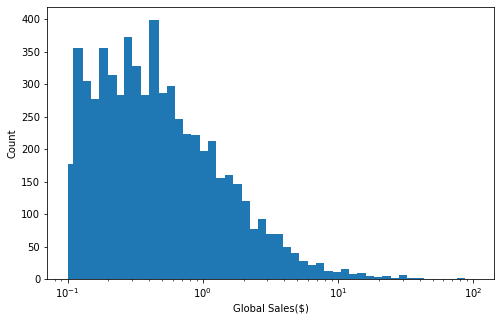

In [12]:
# there's a long tail in the distribution, so let's put it on a log scale instead
print(np.max(vgsales['Global_Sales']))
bins = np.logspace(1,4,dtype="int")/100

plt.figure(figsize=[8,5])
plt.hist(data = vgsales, x = 'Global_Sales', bins = bins)
plt.xscale('log')
plt.xlabel('Global Sales($)')
plt.ylabel("Count")
plt.show()

**The graph above suggests that most games have a global sales between 0.1 and 1 dollar.**

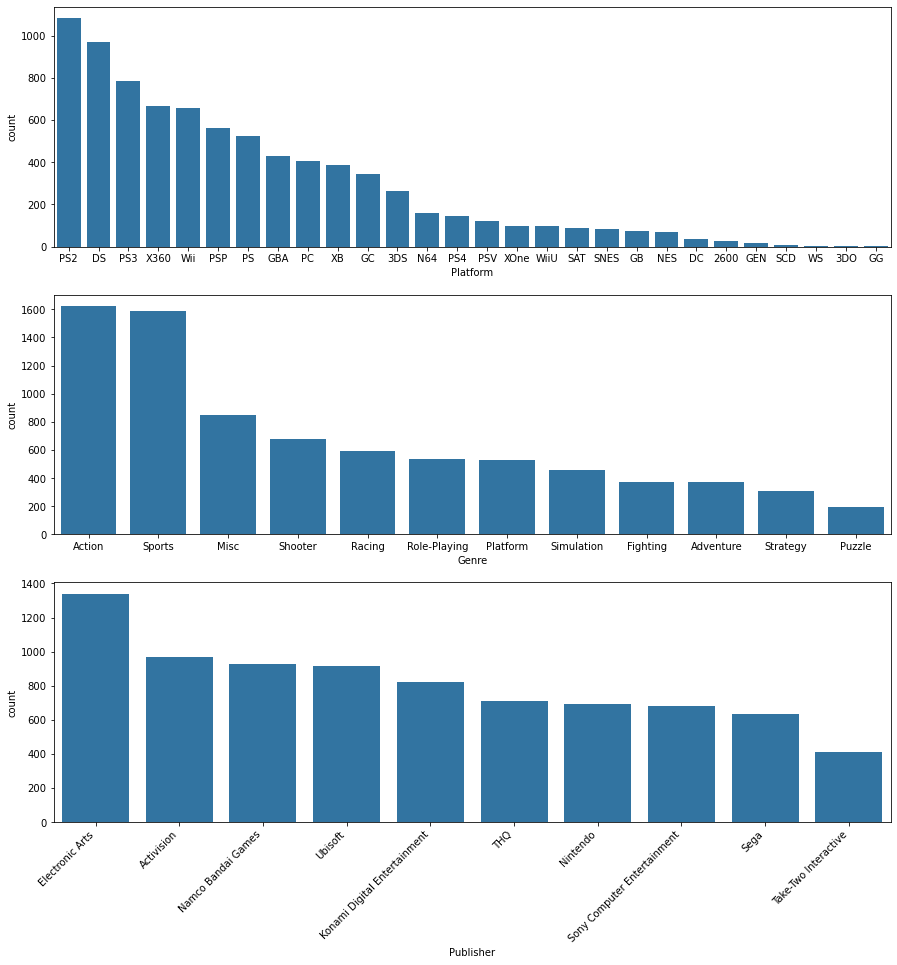

In [13]:
# let's plot platform, publisher, and genre together to get an idea of each variable's distribution.
fig, ax = plt.subplots(nrows=3, figsize = [15,15])

default_color = sb.color_palette()[0]
sb.countplot(data = vgsales, x = 'Platform', color = default_color, ax = ax[0],order=vgsales['Platform'].value_counts().index)
sb.countplot(data = vgsales, x = 'Genre', color = default_color, ax = ax[1],order=vgsales['Genre'].value_counts().index)
chart = sb.countplot(data = vgsales, x = 'Publisher', color = default_color, ax = ax[2],order=vgsales['Publisher'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**In the platform graph, we can see that the data is right skewed. This means that games have favorable platform.  
In the genre graph, we can see that publishers tend to make action and sport games than other genres.  
In the publisher graph, we can see that Electronic Arts make most number of games. Other publishers make similar amount of games.** 

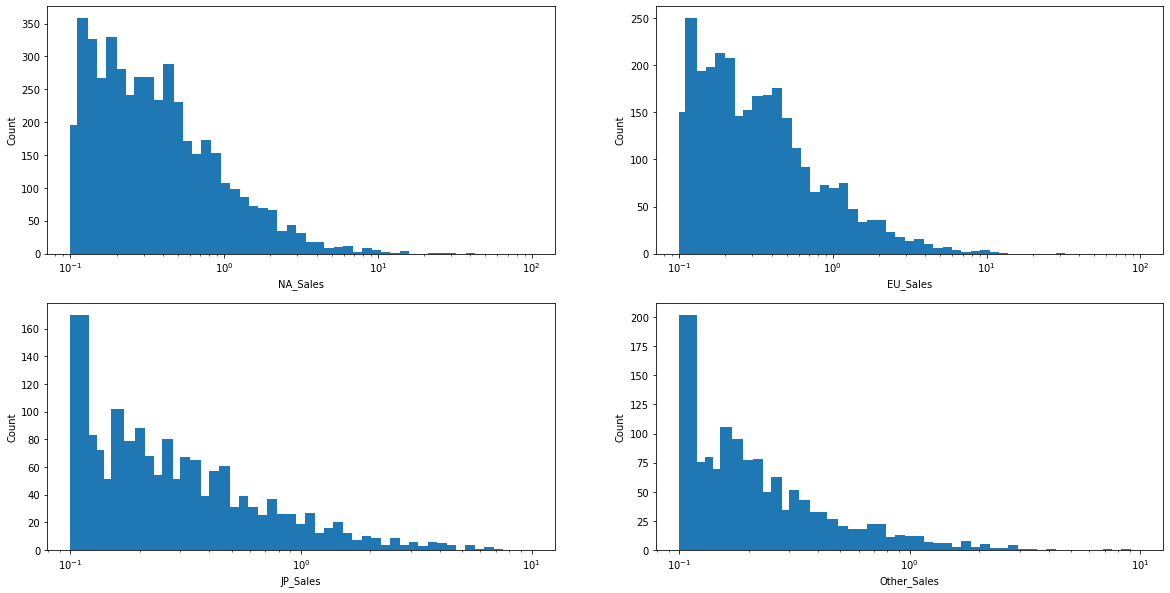

In [14]:
#Next, let's explore other features: NA Sales, EU Sales, JP Sales, and Other Sales.
bin1= np.logspace(1,4,dtype="int")/100
bin2 = np.logspace(1,3,dtype="int")/100
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(data = vgsales, x = 'NA_Sales', bins=bin1)
plt.xlabel("NA_Sales")
plt.ylabel("Count")
plt.xscale('log')

plt.subplot(2,2,2)
plt.hist(data = vgsales, x = 'EU_Sales', bins=bin1)
plt.xlabel("EU_Sales")
plt.ylabel("Count")
plt.xscale('log')

plt.subplot(2,2,3)
plt.hist(data = vgsales, x = 'JP_Sales', bins=bin2)
plt.xlabel("JP_Sales")
plt.ylabel("Count")
plt.xscale('log')

plt.subplot(2,2,4)
plt.hist(data = vgsales, x = 'Other_Sales',bins=bin2)
plt.xlabel("Other_Sales")
plt.ylabel("Count")
plt.xscale('log')
plt.show()

**As expected, they are all right skewed. In the global sales, the right sketed trend becomes clear after 1 dollar. But here, only NA sales looks a lot similar to the global trend.**

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The global sales is very right skewed so we have to use log to plot it. 
Certain genres, platforms, and publishers have more games. This may imply that they have better sales. Genres and publishers are more evenly distributed than platforms.
## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶
Nothing unsusual


## Bivariate Exploration

In [15]:
# We are going to study the relationship between 2 variables. Now let's divde variables into 2 groups: numeric and categorical.
numeric_vars = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']
categoric_vars = ['Platform',	'Genre',	'Publisher']

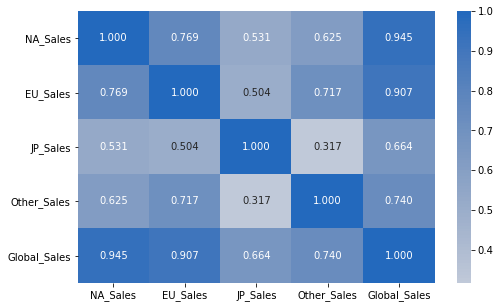

In [16]:
# correlation plot between numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(vgsales[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**NA, EU, and Other sales are strongly correlated with Global Sales. Japan sales is moderately correlated with global sales.**

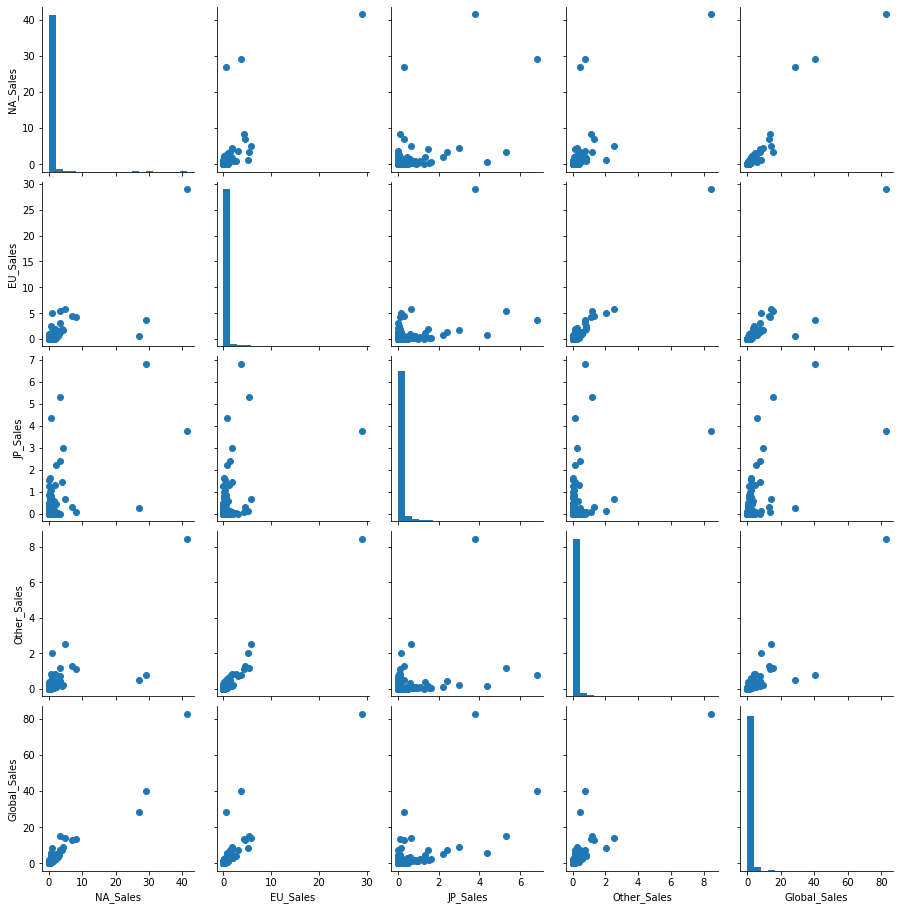

In [17]:
# A clear way to see correlation between numberical variables
vgsales_samp = vgsales.sample(500, replace = False)

g = sb.PairGrid(data = vgsales_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

**NA and EU sales have a more linear relationship with global sales than JP and other sales.**

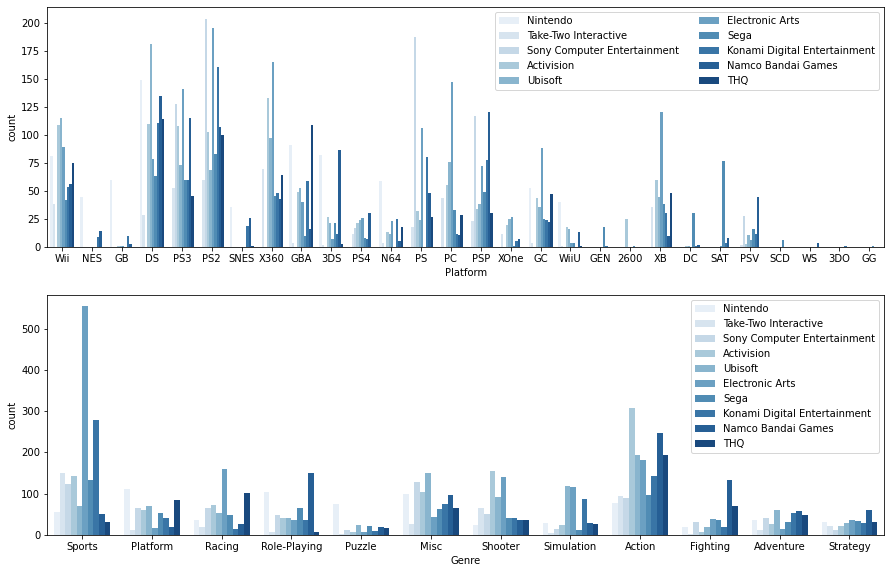

In [18]:
# Let's take a look at relationships between categorical variables
plt.figure(figsize = [15,15])

# subplot 1: Platform vs Publisher
ax = plt.subplot(3, 1, 1)
sb.countplot(data = vgsales, x = 'Platform', hue = 'Publisher', palette = 'Blues')
ax.legend(loc='upper right', ncol=2)

# subplot 2: Genre vs. Publisher
ax = plt.subplot(3, 1, 2)
sb.countplot(data = vgsales, x = 'Genre', hue = 'Publisher', palette = 'Blues')
ax.legend(loc= "upper right") # re-arrange legend to reduce overlapping

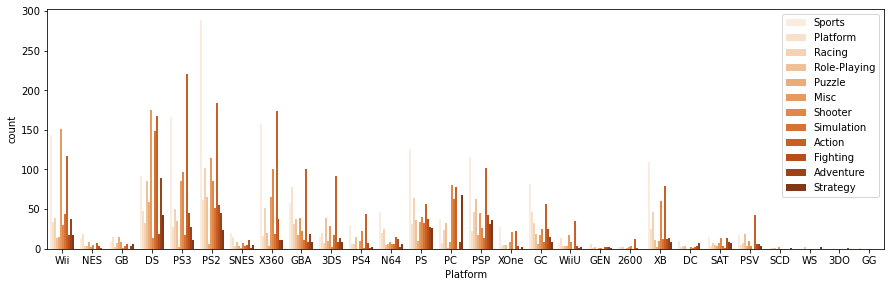

In [19]:
# subplot 3: Platform vs. Genre, use different color palette
plt.figure(figsize = [15,15])
ax = plt.subplot(3, 1, 3)
sb.countplot(data = vgsales, x = 'Platform', hue = 'Genre', palette = 'Oranges')
ax.legend(loc = "upper right", ncol = 1) # re-arrange legend to remove overlapping

**Different publishers have different favorable platforms and genres.
Different genres have different favorable platforms.**

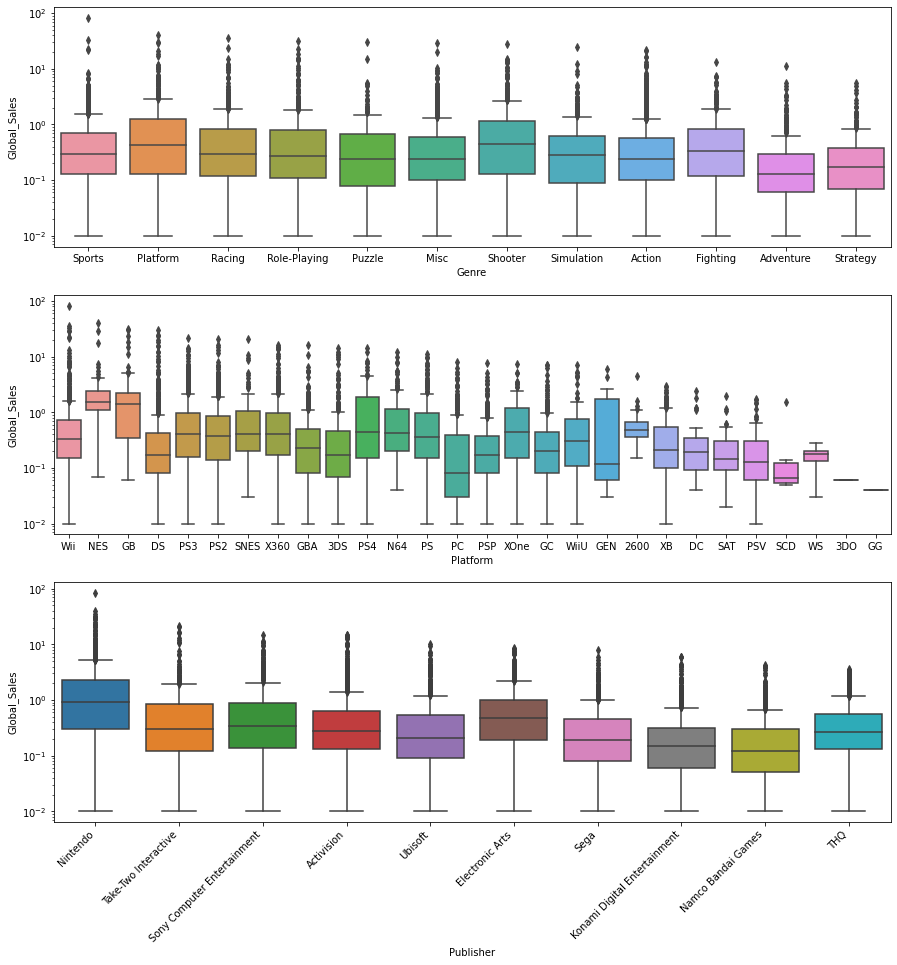

In [33]:
# Let's take a look at how different publishers, genres, and platforms correlated with sales.
plt.figure(figsize=(15,15))

# Genre vs Global Sales
ax = plt.subplot(3, 1, 1)
sb.boxplot( x=vgsales["Genre"], y=vgsales["Global_Sales"] )
plt.yscale('log')

# Platform vs Global Sales
ax = plt.subplot(3, 1, 2)
sb.boxplot( x=vgsales["Platform"], y=vgsales["Global_Sales"] )
plt.yscale('log')

# Plublisher vs Global Sales
ax = plt.subplot(3, 1, 3)
chart=sb.boxplot( x=vgsales["Publisher"], y=vgsales["Global_Sales"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.yscale('log')

**Publishers have similar median global sales. Genres have simlar median sales. However, platforms do not have similar median global sales.**

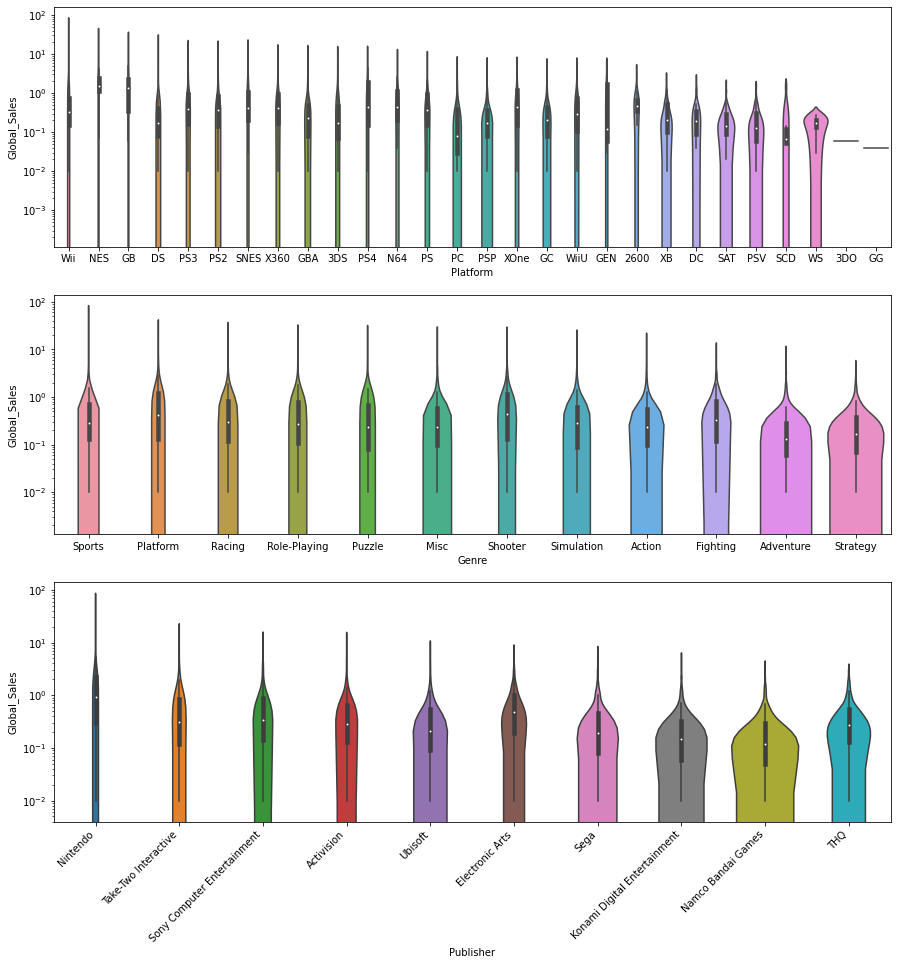

In [34]:
# Violin plots can show us what price ranges sell the most
plt.figure(figsize=(15,15))

# 1 Platform vs. Global Sales
plt.subplot(3, 1, 1)
sb.violinplot( x=vgsales["Platform"], y=vgsales["Global_Sales"] )
plt.yscale('log')

# 2 Genre vs. Global Sales
plt.subplot(3, 1, 2)
sb.violinplot( x=vgsales["Genre"], y=vgsales["Global_Sales"] )
plt.yscale('log')

# 1 Publisher vs. Global Sales
plt.subplot(3, 1, 3)
chart=sb.violinplot( x=vgsales["Publisher"], y=vgsales["Global_Sales"] )
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.yscale('log')

**SAT, PSV, and WS are wider than other platforms  
Adventure and stragtegy games are wider than other geners.  
Sega,Konami Digital Entertainment, Namco Bandai Games, and THQ are wider than other publishers.**

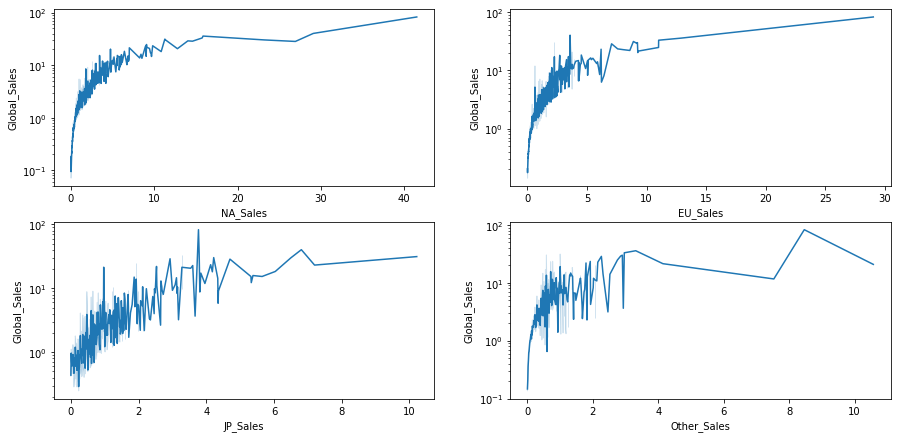

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(4, 2, 1)
sb.lineplot( x=vgsales["NA_Sales"], y=vgsales["Global_Sales"] )
plt.yscale('log')

plt.subplot(4, 2, 2)
sb.lineplot( x=vgsales["EU_Sales"], y=vgsales["Global_Sales"] )
plt.yscale('log')

plt.subplot(4, 2, 3)
sb.lineplot( x=vgsales["JP_Sales"], y=vgsales["Global_Sales"] )
plt.yscale('log')

plt.subplot(4, 2, 4)
sb.lineplot( x=vgsales["Other_Sales"], y=vgsales["Global_Sales"] )
plt.yscale('log')

**Overall, they are following a positive relationship with global sales. Interestingly, other sales is relatively unstable than others. There is a huge drop in the graph.**

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
It is interesting to see that they have similar median global sales. It is certain games (outliers) that make their global sales a huge difference.However, platforms do have a big influence over global sales median. Even though global sales median is similar across different genres and publishers, some genres and publishers have higher sales at certain price ranges.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
If we observed the trend of NA or EU sales, we can predict the global sales with a good chance.

## Multivariate Exploration

In [23]:
pub_plat =pd.pivot_table(vgsales, index=['Publisher','Platform'],values=['Global_Sales'],aggfunc=np.sum)

In [24]:
pub_plat.reset_index(inplace=True)

In [25]:
pub_plat = pub_plat.pivot('Publisher', 'Platform', 'Global_Sales') 

C:\Users\Xi\anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


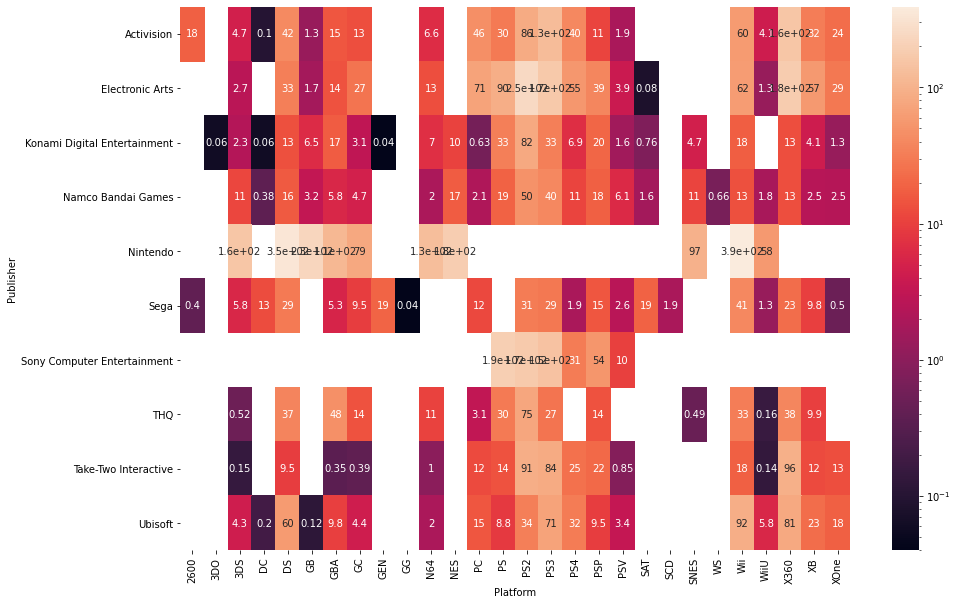

In [26]:
plt.figure(figsize=(15,10))
sb.heatmap(pub_plat,annot=True,norm=LogNorm())
plt.show()

In [27]:
pub_gen =pd.pivot_table(vgsales, index=['Publisher','Genre'],values=['Global_Sales'],aggfunc=np.sum)
pub_gen.reset_index(inplace=True)

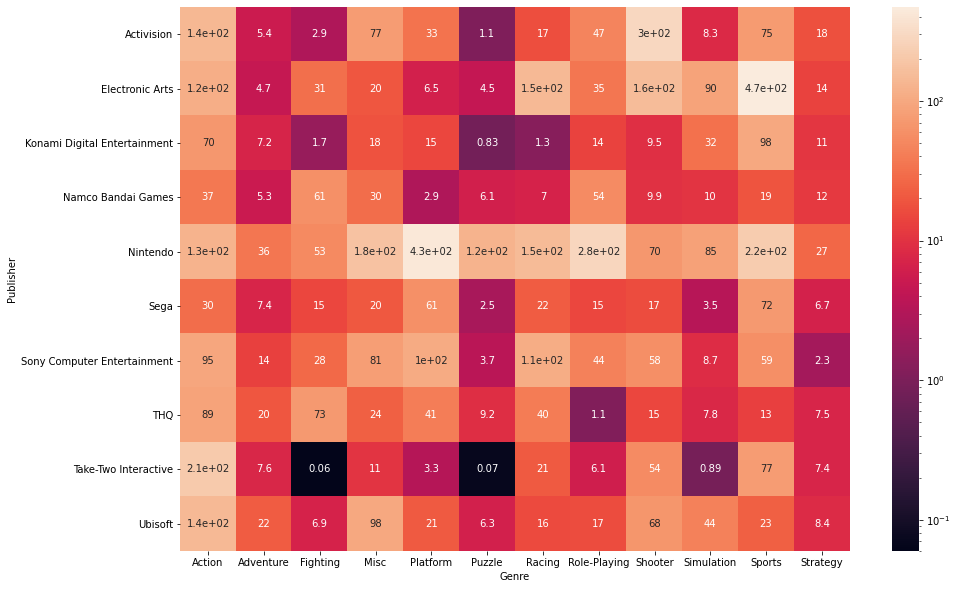

In [28]:
plt.figure(figsize=(15,10))
pub_gen = pub_gen.pivot('Publisher', 'Genre', 'Global_Sales') 
sb.heatmap(pub_gen,annot=True,norm=LogNorm())
plt.show()

In [29]:
plat_gen =pd.pivot_table(vgsales, index=['Platform','Genre'],values=['Global_Sales'],aggfunc=np.sum)
plat_gen.reset_index(inplace=True)

In [30]:
plat_gen = plat_gen.pivot('Platform', 'Genre', 'Global_Sales') 

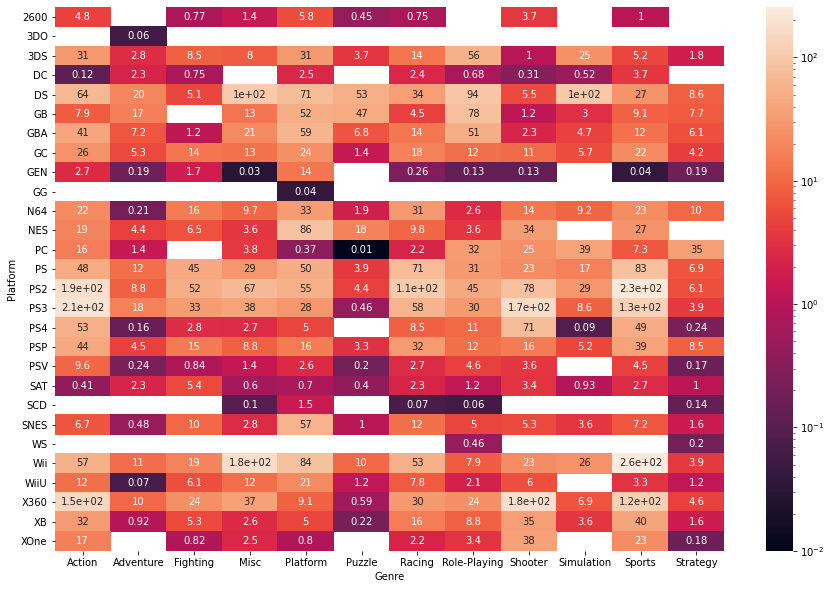

In [31]:
plt.figure(figsize=(15,10))
sb.heatmap(plat_gen,annot=True,norm=LogNorm())
plt.show()

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶
Genres, platfroms, and publishers can have significantly impact on global sales. For example, Ubisoft have much higher global sales on ps3 than on GB. It is certain that each publisher have its own strength.
## Were there any interesting or surprising interactions between features?
We already know that there are more action and sport games than other genres. It is also true that they have better global sales than other genres. They are mostly played on PS2, PS3, Wii, and X360.
